In [18]:
! . /usr/local/bin/thisroot.sh
import ROOT
from ROOT import TFile,TH1,TH1F,TCanvas,TLine,TLegend,TPad
from ROOT import RooFit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from ROOT import RooRealVar,RooAbsPdf,RooChebychev,RooExponential,RooGaussian
from ROOT import RooAbsPdf,RooPlot,RooAddPdf,RooDataHist,RooArgSet,RooArgList
from ROOT import RooVoigtian
from ROOT import kGreen,kRed,kBlack,kBlue,kDashed,kDotted,kMagenta
from ROOT.RooFit import Components,LineColor,LineStyle,Name,Normalization,Layout,Format,Label,Parameters,Range,Title

In [3]:
! ls -trl X4140*.root

-rw-r--r--  1 adrianodiflorio  staff  1712861 19 Ott 13:07 X4140_MuMuKK_KRe_MuMixed_NP3_Alpha99.root
-rw-r--r--  1 adrianodiflorio  staff  3160565 19 Ott 15:13 X4140_MuMuKK_KRe_MuMixed_NP3.5_Alpha99_CW5.2-5.55.root
-rw-r--r--  1 adrianodiflorio  staff  1636569 24 Ott 19:17 X4140_MuMuKK_KRe_MuRef_EtaX1.1_NP3.5_Alpha99_CW5.2-5.55.root
-rw-r--r--  1 adrianodiflorio  staff  1518863 24 Ott 21:40 X4140_MuMuKK_KRe_MuRef_EtaX1.1_NP3.5_Alpha99_CW5.2-5.55_2.root
-rw-r--r--  1 adrianodiflorio  staff  2621160 28 Ott 10:11 X4140_MuMuKK_KRe_MuRef_NP3.5_Alpha99_DM_CW5.15-5.55.root
-rw-r--r--  1 adrianodiflorio  staff   207231 16 Nov 13:07 X4140_MuMuKK_KRe_MuRef_Sidebands_NP3.5_Alpha99_CW5.15-5.55.root
-rw-r--r--  1 adrianodiflorio  staff  3044497 17 Nov 17:46 X4140_Base_KRe_MuRef_NoQual_Sidebands5-7_NP3.0_B0Cuts_CW5.15-5.55.root
-rw-r--r--  1 adrianodiflorio  staff  4965973 18 Nov 15:17 X4140_Base_KRe_MuRef_NoQual_Sidebands4-6_NP3.0_B0Cuts_CW5.15-5.55_BCDData.root
-rw-r--r--  1 adrianodiflorio  staff

In [4]:
rootfile = "X4140_Base_Ref_NoQual_Side4-6_NP3.0_CW5.15-5.55_BinWise_XnP.root"
#rootfile ="../rootfiles/X4140_MuMuKK_KRe_MuRef_Sidebands5-7_NP3.0_B0Cuts_CW5.15-5.55.root"
#histname = "Xcand_histo_hlt8_cw_nonprompt_cosalpha"
#histname = "Phi_hist_all_cw_all_cosalpha"
#histname = "PhiMassHisto"
#histname = "SW_PhiMass_NoM"
histname = "SW_PhiMass_BinWise_"
#histname = "Xcand_histo_DM_any_cw_nonprompt_cosalpha"
inputfile  = TFile(rootfile,"READ")

In [5]:
massmin = 1.020-0.031
massmax = 1.020+0.031
phimean = 1.020
mass = RooRealVar("mass","M(KK)[GeV]",massmin,massmax)
#mass.setBins(int(massbins))
yieldmap = {}
notRebin = True

In [6]:
j = 6
for i in range(j,j+1):
    notRebin = True
    c = TCanvas("canvas","canvas",1200,900) ;
    pullpad = TPad("pullpad","pullpad",0.0,0.05,1.0,0.33)
    plotpad = TPad("histopad","histopad",0.0,0.35,1.0,1.0)
    plotpad.SetFillStyle(4004)
    pullpad.SetFillStyle(4004)
    plotpad.Draw()
    pullpad.Draw()
    
    xMin =  4.0 + i*(1.0)/50.0
    xMax = 4.0 + (i+1)*(1.0)/50.0
    histno = histname + str(i)
    hist = inputfile.Get(histno)
    
    #if notRebin:
    #    hist.Rebin(2)
    #    notRebin = False
        
    hist.SetMarkerStyle(ROOT.kFullCircle)
    hist.SetMarkerSize(1.25)
    hist.SetLineColor(kBlack)
    hist.GetXaxis().SetRangeUser(massmin,massmax)
    hist.Draw("E0")
    #c.SaveAs("plots/" + histno + "_" + str(xMin) + "_" + str(xMax) + ".png")
    #c.Clear()

    masslist = RooArgList(mass)
    dh = RooDataHist("dh","dh",masslist,hist)
    
    massbins = (massmax - massmin)/hist.GetBinWidth(2)
    
    mean = RooRealVar("mean","mean of gaussian",phimean,phimean-0.005,phimean+0.005);
    sigma = RooRealVar("sigma","width of gaussian",0.0013);
    sigma1 = RooRealVar("sigma1","width of gaussian1",0.002,0.0005,0.05);
    sigma2 = RooRealVar("sigma2","width of gaussian2",0.004,0.004,0.01);
    gamma = RooRealVar("gamma","gamma of bw",0.005,0.001,0.01);

    a0 = RooRealVar("a0","a0",0.001,-1.,1.)
    a1 = RooRealVar("a1","a1",0.001,-0.5,0.5)
    a2 = RooRealVar("a2","a2",-0.00001,-2.,2.)
    a3 = RooRealVar("a3","a3",0.0)
    a4 = RooRealVar("a4","a4",0.002,-0.1,0.1)
    a5 = RooRealVar("a5","a5",0.001,-0.025,0.05)
    a6 = RooRealVar("a6","a6",0.0,-0.001,0.001)

    aset = RooArgList(a0,a1,a2,a3,a4)#,a6)
    nSig = RooRealVar("nSig","nSig",5E5,0.,5.0E6)
    nBkg = RooRealVar("nBkg","nBkg",2E6,0.,5.0E6)
    
    cheb = RooChebychev("cheb","Background",mass,aset)
    #gauss = RooGaussian("gauss","gaussian PDF ",mass,mean,sigma)
    signal = RooVoigtian("signal","signal",mass,mean,gamma,sigma)

    tot = RooAddPdf("tot","g+cheb",RooArgList(signal,cheb),RooArgList(nSig,nBkg))
    
    tot.fitTo(dh)
    
    massFrame = mass.frame()
    massFrame.SetTitle("Phi signal - " + histno)
    
    dh.plotOn(massFrame,Name("Data"))
    if nSig.getValV() > 1:
        tot.plotOn(massFrame,Name("Pdf"))
    massFrame.GetYaxis().SetTitleOffset(1.3)
    #gauss.plotOn(massFrame,LineColor(kGreen),LineStyle(kDashed),Normalization((sFrac.getValV()*numEvts)/(numEvts)))
    #cheb.plotOn(massFrame,LineColor(kMagenta),LineStyle(kDotted),Normalization(((1.0-sFrac.getValV())*numEvts)/(numEvts)))
    #signal.plotOn(massFrame,LineColor(kGreen),LineStyle(kDashed),Normalization((nSig.getValV())/(numEvts)))
    #cheb.plotOn(massFrame,LineColor(kGreen),LineStyle(kDashed),Normalization((nBkg.getValV())/(numEvts)))
    #massFrame.paramOn()
    plotpad.cd()
    massFrame.Draw()
    
    yieldmap[(xMin,xMax)] = nSig.getValV()
    
    
    hpull = massFrame.pullHist("Data","Pdf")
    pullframe = mass.frame(Title("Pull Distribution"))
    #pullframe.GetXaxis().SetTitleSize(0.04)
    #pullframe.GetYaxis().SetTitleSize(0.03)
    ROOT.gStyle.SetTitleFontSize(0.07)
    pullpad.cd()
    pullframe.addPlotable(hpull,"P")
    pullframe.Draw()

        
    c.cd()
    c.SaveAs("plots/" + histno + "_fit.png")
    
    
   
    
    

KeyboardInterrupt: 

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(dh): fit range of variable mass expanded to nearest bin boundaries: [0.989,1.051] --> [0.989,1.051]
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(signal_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(signal_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (signal,cheb)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           1.00000e-03  2.00000e-01   -1.00000e+00  1.00000e+00
     2 a1           1.

In [33]:
print yieldmap

{(4.26, 4.28): 2886.819838722188, (4.2, 4.22): 2411.870093500801, (4.22, 4.24): 3084.0697929127027, (4.16, 4.18): 1922.082614703169, (4.12, 4.14): 3009.798947381792, (4.1, 4.12): 0.0016218182352645272, (4.14, 4.16): 1645.8751635886615, (4.18, 4.2): 2235.0714436664143, (4.24, 4.26): 3476.7951660602535, (4.08, 4.1): 1.4757639554829893e-06}


In [ ]:
line = TLine()

In [16]:
hist.GetXaxis().SetRangeUser(massmin,massmax)
hist.Draw()
plotname = "plots/phiplot_" + histname
c.SaveAs(plotname  + ".png")
c.SaveAs(plotname  + ".eps")
c.SaveAs(plotname  + ".pdf")

Info in <TCanvas::Print>: png file plots/phiplot_SW_PhiMass_BinWise_.png has been created
Info in <TCanvas::Print>: eps file plots/phiplot_SW_PhiMass_BinWise_.eps has been created
Info in <TCanvas::Print>: pdf file plots/phiplot_SW_PhiMass_BinWise_.pdf has been created


In [8]:
cheb = RooChebychev("cheb","Background",mass,aset)
#gauss = RooGaussian("gauss","gaussian PDF ",mass,mean,sigma)
signal = RooVoigtian("signal","signal",mass,mean,gamma,sigma)

tot = RooAddPdf("tot","g+cheb",RooArgList(signal,cheb),RooArgList(nSig,nBkg))

In [9]:
masslist = RooArgList(mass)
dh = RooDataHist("dh","dh",masslist,hist)
numEvts = dh.sum(False)
print numEvts

2213156.0
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(dh): fit range of variable mass expanded to nearest bin boundaries: [0.989,1.051] --> [0.989,1.051]


In [10]:
tot.fitTo(dh,Range(massmin,massmax))

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'fit' created with bounds [0.989,1.051]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_tot_dh) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'NormalizationRangeForfit' created with bounds [0.989,1.051]
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'fit_nll_tot_dh' created with bounds [0.989,1.051]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_tot_dh) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(signal_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(signal_Int[mass|NormalizationRangeForfit]_Norm[mass]) using numeric integrator RooIntegrator1D to calculate

In [11]:
plotmax = hist.GetMaximum()*1.05
#sidesigma = sigma.getValV()
sidesigma = gamma.getValV()
#sidesigma = 4.76572e-03
leftlowside = -6.*sidesigma + mean.getValV()
leftupside = -4.*sidesigma + mean.getValV()
rightlowside = +4.*sidesigma + mean.getValV()
rightupside = +6.*sidesigma + mean.getValV()

signallow = -3.*sidesigma + mean.getValV()
signalup = +3.*sidesigma + mean.getValV()

print "Side Sigma"
print "%.5e" % sidesigma
print "Left Side"
print "%.5f - %.5f" % (leftlowside,leftupside)
print mean.getValV()

Side Sigma
2.94767e-03
Left Side
1.00168 - 1.00758
1.01937047694


In [12]:
for param in [False,True]:
    cmass = TCanvas("canvas","canvas",1200,1200) ;
    JPsi_mass = 3.096916
    Phi_mass = 1.019455
    th_mass = JPsi_mass + Phi_mass

    pullpad = TPad("pullpad","pullpad",0.0,0.05,1.0,0.33)
    plotpad = TPad("histopad","histopad",0.0,0.35,1.0,1.0)
    plotpad.SetFillStyle(4004)
    pullpad.SetFillStyle(4004)
    plotpad.Draw()
    pullpad.Draw()

    massFrame = mass.frame()
    massFrame.SetTitle("Phi signal - CC - NonPrompt")
    dh.plotOn(massFrame,Name("Data"))
    tot.plotOn(massFrame,Name("Pdf"))
    massFrame.GetYaxis().SetTitleOffset(1.3)
    #gauss.plotOn(massFrame,LineColor(kGreen),LineStyle(kDashed),Normalization((sFrac.getValV()*numEvts)/(numEvts)))
    #cheb.plotOn(massFrame,LineColor(kMagenta),LineStyle(kDotted),Normalization(((1.0-sFrac.getValV())*numEvts)/(numEvts)))
    signal.plotOn(massFrame,LineColor(kGreen),LineStyle(kDashed),Normalization((nSig.getValV())/(numEvts)))
    cheb.plotOn(massFrame,LineColor(kGreen),LineStyle(kDashed),Normalization((nBkg.getValV())/(numEvts)))
    if param:
        tot.paramOn(massFrame,Layout(0.60,0.99,0.75))
    plotpad.cd()
    massFrame.Draw()

    linelow = TLine(leftlowside,0.0,leftlowside,plotmax)
    linemidlow = TLine(leftupside,0.0,leftupside,plotmax)
    linemidup = TLine(rightlowside,0.0,rightlowside,plotmax)
    lineup = TLine(rightupside,0.0,rightupside,plotmax)

    linesiglow = TLine(signallow,0.0,signallow,plotmax)
    linesigup = TLine(signalup,0.0,signalup,plotmax)

    linelow.SetLineColor(kRed)
    linemidlow.SetLineColor(kRed)
    linemidup.SetLineColor(kRed)
    lineup.SetLineColor(kRed)

    linesiglow.SetLineColor(kGreen)
    linesigup.SetLineColor(kGreen) 

    linelow.SetLineWidth(2)
    linemidlow.SetLineWidth(2)
    linemidup.SetLineWidth(2)
    lineup.SetLineWidth(2)

    linesiglow.SetLineWidth(2)
    linesigup.SetLineWidth(2) 
    
    if not param:
        linelow.Draw()
        linemidlow.Draw()
        linemidup.Draw()
        lineup.Draw()

        linesiglow.Draw()
        linesigup.Draw()


    hpull = massFrame.pullHist("Data","Pdf")
    pullframe = mass.frame(Title("Pull Distribution"))
    #pullframe.GetXaxis().SetTitleSize(0.04)
    #pullframe.GetYaxis().SetTitleSize(0.03)
    ROOT.gStyle.SetTitleFontSize(0.07)
    pullpad.cd()

    pullframe.addPlotable(hpull,"P")
    pullframe.Draw()
    upLine = TLine(massmin,3.0,massmax,3.0)
    upLine.SetLineColor(kRed)
    upLine.SetLineStyle(kDashed)
    upLine.SetLineWidth(2)
    dwLine = TLine(massmin,-3.0,massmax,-3.0)
    dwLine.SetLineColor(kRed)
    dwLine.SetLineStyle(kDashed)
    dwLine.SetLineWidth(2)
    dwLine.Draw()
    upLine.Draw()
    plotname = "plots/phi_" 
    
    if param:
        plotname += "paramon_"
        
    plotname += histname
    cmass.SaveAs(plotname  + ".png")
    #cmass.SaveAs(plotname  + ".eps")
    cmass.SaveAs(plotname  + ".pdf")

[#1] INFO:Plotting -- RooAbsPdf::plotOn(tot) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(tot) only plotting range 'fit_nll_tot_dh'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(tot) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_tot_dh'
[#1] INFO:NumericIntegration -- RooRealIntegral::init(signal_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tot_Int[mass|fit_nll_tot_dh]_Norm[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(signal_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(tot) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(tot) only plotting range 'fit_nll_to

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file plots/phi_SW_PhiMass.png has been created
Info in <TCanvas::Print>: pdf file plots/phi_SW_PhiMass.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file plots/phi_paramon_SW_PhiMass.png has been created
Info in <TCanvas::Print>: pdf file plots/phi_paramon_SW_PhiMass.pdf has been created


In [13]:
Adriano Di Floriomass.setRange("signalrange",signallow,signalup)
mass.setRange("sideleftrange",leftlowside,leftupside)
mass.setRange("siderightrange",rightlowside,rightupside)
signalIntegralBkg = cheb.analyticalIntegral(cheb.getAnalyticalIntegral(RooArgSet(mass),RooArgSet(mass)),"signalrange")
leftsideIntegralBkg = cheb.analyticalIntegral(cheb.getAnalyticalIntegral(RooArgSet(mass),RooArgSet(mass)),"sideleftrange")
rightsideIntegralBkg = cheb.analyticalIntegral(cheb.getAnalyticalIntegral(RooArgSet(mass),RooArgSet(mass)),"siderightrange")

[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'signalrange' created with bounds [1.01053,1.02821]
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'sideleftrange' created with bounds [1.00168,1.00758]
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'siderightrange' created with bounds [1.03116,1.03706]


In [14]:
totIntegralBkg = cheb.analyticalIntegral(cheb.getAnalyticalIntegral(RooArgSet(mass),RooArgSet(mass)))

In [15]:
#sigBkgEvts = signalIntegralBkg/totIntegralBkg*((1.0-sFrac.getValV())*numEvts)
#sidBkgEvts = (leftsideIntegralBkg+rightsideIntegralBkg)/totIntegralBkg*((1.0-sFrac.getValV())*numEvts)
sigBkgEvts = signalIntegralBkg/totIntegralBkg*((nBkg.getValV()))
sidBkgEvts = (leftsideIntegralBkg+rightsideIntegralBkg)/totIntegralBkg*((nBkg.getValV()))

In [16]:
print sigBkgEvts

674147.481307


In [17]:
print sidBkgEvts

416255.908085


In [26]:
ratio = sigBkgEvts/sidBkgEvts
print ratio

1.61955054142


In [28]:
theRatio = 1.61955054142
siderootfile = "../rootfiles/X4140_Base_AllDatasets.root"
sidefile  = TFile(siderootfile,"READ")

In [29]:
signalSW = sidefile.Get("SW_Mass_Signal")
sideSW_L = sidefile.Get("SW_Mass_L_Side")
sideSW_R = sidefile.Get("SW_Mass_R_Side")
notrebin = True

In [30]:
if notrebin:
    signalSW.Rebin(10)
    sideSW_L.Rebin(10)
    sideSW_R.Rebin(10)
    notrebin = False

In [31]:
#sideSW = sideSW_L.Clone()
#sideSW.Add(sideSW_R)
#sideSW.Scale(ratio)
sideSW_L.Scale(theRatio)
sideSW_R.Scale(theRatio)

In [34]:
cY = TCanvas("cB0","cB0",1200,800)

signalSW.SetFillColor(kBlue)
signalSW.SetName("X Candidates Mass - SC")
signalSW.SetTitle("X Candidates Mass - SC; M(KK#mu#mu)[GeV]; candidates/" + str(signalSW.GetBinWidth(2)*1000)+ "MeV")
signalSW.GetYaxis().SetTitleOffset(1.3)
#signalSW.SetMarkerColor(kBlack)
signalSW.SetFillStyle(3002)
signalSW.SetMarkerStyle(ROOT.kFullCircle)
signalSW.SetMarkerSize(0.65)
signalSW.SetLineColor(kBlack)

sideSW_L.SetFillColor(kRed)
#sideSW_L.SetMarkerColor(kBlack)
sideSW_L.SetFillStyle(3002)
sideSW_L.SetMarkerStyle(ROOT.kFullCircle)
sideSW_L.SetMarkerSize(0.65)
sideSW_L.SetLineColor(kBlack)

sideSW_R.SetFillColor(kGreen)
#sideSW_R.SetMarkerColor(kBlack)
sideSW_R.SetMarkerStyle(ROOT.kFullCircle)
sideSW_R.SetMarkerSize(0.65)
sideSW_R.SetLineColor(kBlack)
sideSW_R.SetFillStyle(3002)

side = sideSW_R.Clone()
side.Add(sideSW_L,1.0)

signalSW.Draw("EBar")
#sideSW = sideSW_L.Clone()
#sideSW.Add(sideSW_R,+1.0)
#sideSW.SetFillColor(kRed)
#sideSW.SetFillStyle(3002)
#sideSW.Scale(2.0)
#sideSW.Draw("SAMEBar")
sideSW_R.Draw("E0SAMEBar")
sideSW_L.Draw("E0SAMEBar")
#side.Draw("E0SAMEBar")

legend = TLegend(0.75,0.45,0.99,0.75)
legend.AddEntry(signalSW,"Signal region (-3.0#sigma,+3.0#sigma)","f")
legend.AddEntry(sideSW_R,"R-sideband    (+4.0#sigma,+6.0#sigma)","f")
legend.AddEntry(sideSW_L,"L-sideband    (-6.0#sigma,-4.0#sigma)","f")
legend.Draw()
cY.SaveAs("plots/" + signalSW.GetName() + "_sidebands.png")
cY.SaveAs("plots/" + signalSW.GetName() + "_sidebands.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cB0
Info in <TCanvas::Print>: png file plots/X Candidates Mass - SC_sidebands.png has been created
Info in <TCanvas::Print>: pdf file plots/X Candidates Mass - SC_sidebands.pdf has been created


In [35]:
Adriano Di FlorioROOT.gStyle.SetOptStat(0)
ySideSub = signalSW.Clone("SW Mass")
ySideSub.SetTitle("X Mass - #phi sides subtracted; M(KK#mu#mu)[GeV]; candidates/" + str(signalSW.GetBinWidth(2)*1000)+ "MeV")
ySideSub.GetYaxis().SetTitleOffset(1.2)
#ySideSub.Add(sideSW,-1.0) 
ySideSub.Add(sideSW_L,-1.0)
ySideSub.Add(sideSW_R,-1.0)

True

In [36]:
ySideSub.SetFillColor(4004)
ySideSub.SetFillStyle(3002)
ySideSub.SetMarkerStyle(ROOT.kFullCircle)
ySideSub.SetMarkerColor(kBlack)
ySideSub.SetMarkerSize(0.8)
ySideSub.SetLineColor(kBlack)
ySideSub.Draw("E0")
lineth = TLine(th_mass,ySideSub.GetMinimum()*1.25,th_mass,ySideSub.GetMaximum()*1.1)
lineth.SetLineColor(kBlue)
lineth.SetLineWidth(2)
lineth.SetLineStyle(kDashed)
lineth.Draw()
linezero = TLine(ySideSub.GetBinCenter(1),0.0,ySideSub.GetBinCenter(ySideSub.GetNbinsX()),0.0)
linezero.SetLineColor(kRed)
linezero.SetLineWidth(2)
linezero.SetLineStyle(kDotted)
linezero.Draw()
cY.SaveAs("plots/" + signalSW.GetName() + "_subtracted.png")
cY.SaveAs("plots/" + signalSW.GetName() + "_subtracted.pdf")

In [1]:
plt.hist([],range=[4.0,6.0],bins=100)

NameError: name 'plt' is not defined

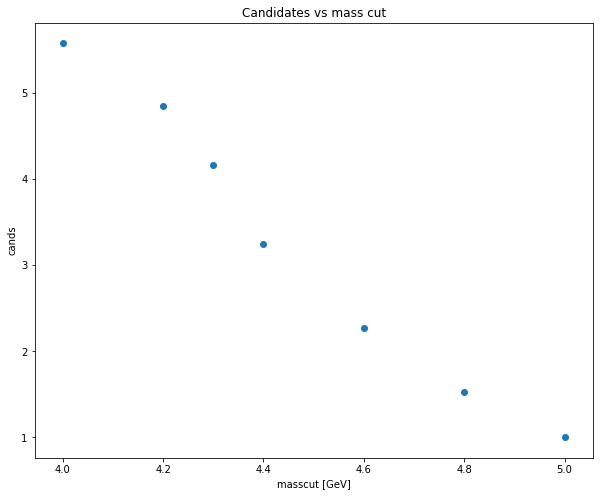

In [42]:
cands =np.array([533778.0, 464027.0, 398157.0, 311156.0, 217232.0, 146840.0, 95795.0])
cuts = [4.0,4.2,4.3,4.4,4.6,4.8,5.0]
rates = np.array([23.,23.,22.61,21.39,18.97,17.36,15.34])
plt.figure(1,(10,8))
plt.scatter(cuts,cands/cands[-1])
plt.title("Candidates vs mass cut")
plt.xlabel("masscut [GeV]")
plt.ylabel("cands")
plt.show()

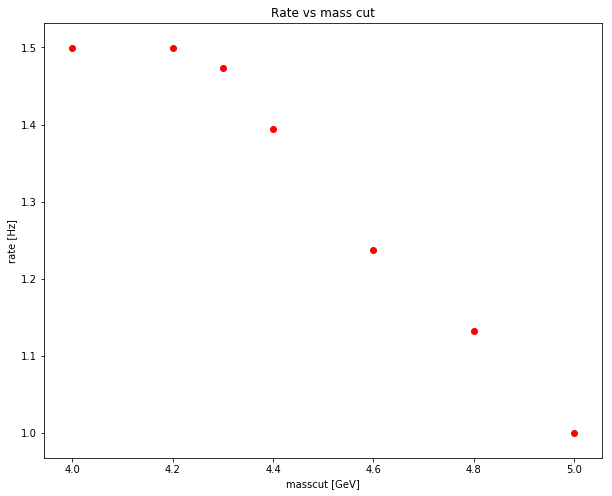

In [44]:
cuts = [4.0,4.2,4.3,4.4,4.6,4.8,5.0]
plt.figure(1,(10,8))
plt.scatter(cuts,rates/rates[-1],color="red")

plt.title("Rate vs mass cut")
plt.xlabel("masscut [GeV]")
plt.ylabel("rate [Hz]")
plt.show()

In [ ]:
cuts = [4.0,4.2,4.3,4.4,4.6,4.8,5.0]
plt.figure(1,(10,8))
plt.scatter(cuts,rates/rates[-1],color="red")
plt.scatter(cuts,rates/rates[-1],color="red")
plt.title("Rate vs mass cut")
plt.xlabel("masscut [GeV]")
plt.ylabel("rate [Hz]")
plt.show()